In [47]:
# Loading dependencies
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter
import seaborn as sns
import numpy as np
from typing import List
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import eli5
import ast 
import nltk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import cloudpickle
from typing import Optional, Any, List, Dict
from scipy.stats import randint
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\empar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\empar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\empar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
#Loading data
df = pd.read_csv("./data/ebay_tmpe.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5263 entries, 0 to 5262
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       5263 non-null   object
 1   price       5263 non-null   object
 2   link        5263 non-null   object
 3   condition   5263 non-null   object
 4   item_specs  5263 non-null   object
dtypes: object(5)
memory usage: 205.7+ KB


In [5]:
#Cleaning data
df.dropna(inplace=True)

In [6]:
df.head()

,title,price,link,condition,item_specs
0,None,None,https://ebay.com/itm/123456?hash=item28caef0a3...,None,"{'None': 'None', 'Condition:': 'None'}"
1,MSI GeForce RTX™ 4080 16GB GAMING X TRIO Graph...,"£1,299.99 each",https://www.ebay.co.uk/itm/404068474422?epid=1...,New,"{'Condition:': 'New', 'MPN:': 'RTX 4080 16GB G..."
2,2 Assorted Graphics Card's Untested Inc Asus R...,£21.00,https://www.ebay.co.uk/itm/385369291880?hash=i...,Used,"{'Condition:': 'Used', 'Brand:': 'ASUS', 'Chip..."
3,Refurbished Gigabyte Radeon RX 6700 XT Gaming ...,£235.00,https://www.ebay.co.uk/itm/285122552053?hash=i...,Used,"{'Condition:': 'Used', 'Brand:': 'GIGABYTE', '..."
4,MSI GeForce GTX 1660 Super Gaming X 6GB Graphi...,£150.00,https://www.ebay.co.uk/itm/134418759695?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Like..."


In [7]:
df.loc[df.price == "None"]

,title,price,link,condition,item_specs
0,None,None,https://ebay.com/itm/123456?hash=item28caef0a3...,None,"{'None': 'None', 'Condition:': 'None'}"
38,None,None,https://www.ebay.co.uk/itm/165907140699?epid=1...,None,"{'None': 'None', 'Condition:': 'None'}"
60,None,None,https://ebay.com/itm/123456?hash=item28caef0a3...,None,"{'None': 'None', 'Condition:': 'None'}"
95,None,None,https://www.ebay.co.uk/itm/165905256281?epid=1...,None,"{'None': 'None', 'Condition:': 'None'}"
96,None,None,https://www.ebay.co.uk/itm/155367721814?epid=6...,None,"{'None': 'None', 'Condition:': 'None'}"
...,...,...,...,...,...
4980,None,None,https://ebay.com/itm/123456?hash=item28caef0a3...,None,"{'None': 'None', 'Condition:': 'None'}"
5040,None,None,https://ebay.com/itm/123456?hash=item28caef0a3...,None,"{'None': 'None', 'Condition:': 'None'}"
5100,None,None,https://ebay.com/itm/123456?hash=item28caef0a3...,None,"{'None': 'None', 'Condition:': 'None'}"
5160,None,None,https://ebay.com/itm/123456?hash=item28caef0a3...,None,"{'None': 'None', 'Condition:': 'None'}"


In [8]:
df.drop(df.index[(df["price"] == "None")],axis=0,inplace=True)

In [9]:
df.head(10)

,title,price,link,condition,item_specs
1,MSI GeForce RTX™ 4080 16GB GAMING X TRIO Graph...,"£1,299.99 each",https://www.ebay.co.uk/itm/404068474422?epid=1...,New,"{'Condition:': 'New', 'MPN:': 'RTX 4080 16GB G..."
2,2 Assorted Graphics Card's Untested Inc Asus R...,£21.00,https://www.ebay.co.uk/itm/385369291880?hash=i...,Used,"{'Condition:': 'Used', 'Brand:': 'ASUS', 'Chip..."
3,Refurbished Gigabyte Radeon RX 6700 XT Gaming ...,£235.00,https://www.ebay.co.uk/itm/285122552053?hash=i...,Used,"{'Condition:': 'Used', 'Brand:': 'GIGABYTE', '..."
4,MSI GeForce GTX 1660 Super Gaming X 6GB Graphi...,£150.00,https://www.ebay.co.uk/itm/134418759695?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Like..."
5,AMD RADEON RX 480 8GB GDDR5 GRAPHICS CARD,£12.50,https://www.ebay.co.uk/itm/314349099024?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“GOOD..."
6,NVIDIA GeForce RTX 3060 Ti Founders Edition 8G...,£197.00,https://www.ebay.co.uk/itm/125729481129?epid=2...,Used,"{'Condition:': 'Used', 'EAN:': '0812674024608'..."
7,GIGABYTE GeForce RTX 3080 TURBO 10GB GDDR6X Gr...,£334.00,https://www.ebay.co.uk/itm/334713276735?epid=1...,Used,"{'Condition:': 'Used', 'EAN:': '4719331308315'..."
8,EVGA GeForce GTX 1080 FTW2 GAMING 8GB GDDR5X G...,US $75.00,https://www.ebay.co.uk/itm/225378339640?epid=6...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Used..."
9,ASUS Dual GeForce RTX 3060 Ti Graphics Card,£201.00,https://www.ebay.co.uk/itm/125731910784?epid=1...,Used,"{'Condition:': 'Used', 'EAN:': '4711081327288'..."
10,MSI GeForce RTX 3060 Ventus 2X 12G OC NVIDIA G...,EUR 264.00,https://www.ebay.co.uk/itm/394426495269?hash=i...,Used,"{'Condition:': 'Used', 'Marca:': 'NVIDIA', 'Pr..."


In [10]:
df.groupby('condition').count()

,title,price,link,item_specs
condition,,,,
New,849,849,849,849
None,1,1,1,1
Used,4297,4297,4297,4297


In [11]:
df.drop(df.index[(df["condition"] == "None")],axis=0,inplace=True)

In [12]:

df['price'] = df['price'].str.replace('each','').str.replace('$','').str.replace('£','').str.replace(',','').str.replace('PLN','')
df['price_float'] = df.price.apply(lambda x: x.split()[-1])

C:\Users\empar\AppData\Local\Temp\ipykernel_1348\3749698996.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('each','').str.replace('$','').str.replace('£','').str.replace(',','').str.replace('PLN','')


In [13]:
df["price"]

1         1299.99 
2            21.00
3           235.00
4           150.00
5            12.50
           ...    
5258     US 139.15
5259    EUR 119.00
5260     US 320.00
5261      US 38.24
5262      US 15.72
Name: price, Length: 5146, dtype: object

In [14]:
df['price_float'] = df['price_float'].astype(float)

In [15]:
df['price_float']

1       1299.99
2         21.00
3        235.00
4        150.00
5         12.50
         ...   
5258     139.15
5259     119.00
5260     320.00
5261      38.24
5262      15.72
Name: price_float, Length: 5146, dtype: float64

In [180]:
df.drop(df[(df['price_float'] < 15)].index, inplace=True)
df.drop(df[(df['price_float'] > 6000)].index, inplace=True)

In [17]:
df.head(10)

,title,price,link,condition,item_specs,price_float
1,MSI GeForce RTX™ 4080 16GB GAMING X TRIO Graph...,1299.99,https://www.ebay.co.uk/itm/404068474422?epid=1...,New,"{'Condition:': 'New', 'MPN:': 'RTX 4080 16GB G...",1299.99
2,2 Assorted Graphics Card's Untested Inc Asus R...,21.00,https://www.ebay.co.uk/itm/385369291880?hash=i...,Used,"{'Condition:': 'Used', 'Brand:': 'ASUS', 'Chip...",21.00
3,Refurbished Gigabyte Radeon RX 6700 XT Gaming ...,235.00,https://www.ebay.co.uk/itm/285122552053?hash=i...,Used,"{'Condition:': 'Used', 'Brand:': 'GIGABYTE', '...",235.00
4,MSI GeForce GTX 1660 Super Gaming X 6GB Graphi...,150.00,https://www.ebay.co.uk/itm/134418759695?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Like...",150.00
6,NVIDIA GeForce RTX 3060 Ti Founders Edition 8G...,197.00,https://www.ebay.co.uk/itm/125729481129?epid=2...,Used,"{'Condition:': 'Used', 'EAN:': '0812674024608'...",197.00
7,GIGABYTE GeForce RTX 3080 TURBO 10GB GDDR6X Gr...,334.00,https://www.ebay.co.uk/itm/334713276735?epid=1...,Used,"{'Condition:': 'Used', 'EAN:': '4719331308315'...",334.00
8,EVGA GeForce GTX 1080 FTW2 GAMING 8GB GDDR5X G...,US 75.00,https://www.ebay.co.uk/itm/225378339640?epid=6...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Used...",75.00
9,ASUS Dual GeForce RTX 3060 Ti Graphics Card,201.00,https://www.ebay.co.uk/itm/125731910784?epid=1...,Used,"{'Condition:': 'Used', 'EAN:': '4711081327288'...",201.00
10,MSI GeForce RTX 3060 Ventus 2X 12G OC NVIDIA G...,EUR 264.00,https://www.ebay.co.uk/itm/394426495269?hash=i...,Used,"{'Condition:': 'Used', 'Marca:': 'NVIDIA', 'Pr...",264.00
11,GIGABYTE GeForce RTX 3070 Ti GAMING OC 8GB GDD...,430.00,https://www.ebay.co.uk/itm/295492678218?epid=2...,Used,"{'Condition:': 'Used', 'EAN:': '0889523028483'...",430.00


In [18]:
df["is_new"] = (df["condition"] == "New").astype(int)

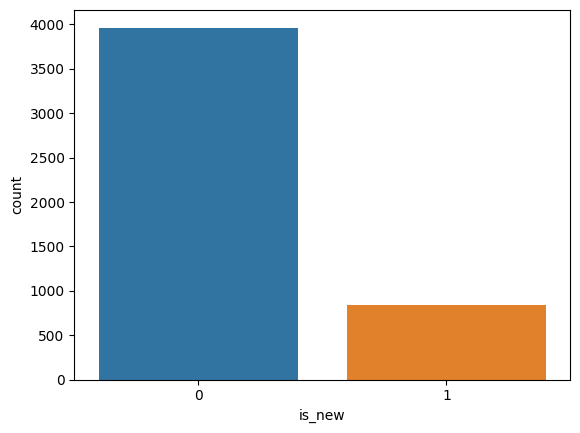

In [19]:
sns.countplot(x="is_new",data=df)
plt.show()

In [20]:
df['item_specs'] = df['item_specs'].apply(lambda x: ast.literal_eval(x))

In [21]:
df[['Chipset Manufacturer:','GPU Model:', 'Brand:','Connectors:','Memory Size:','Chipset/GPU Model:','Memory Type:']] = df['item_specs'].apply(lambda x: pd.Series({'Chipset Manufacturer:':x.get('Chipset Manufacturer:'),'GPU Model:':x.get('GPU Model:'), 'Brand:':x.get('Brand:'),'Connectors:':x.get('Connectors:'),'Memory Size:':x.get('Memory Size:'),'Chipset/GPU Model:':x.get('Chipset/GPU Model:'),'Memory Type:':x.get('Memory Type:')}))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 1 to 5262
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  4806 non-null   object 
 1   price                  4806 non-null   object 
 2   link                   4806 non-null   object 
 3   condition              4806 non-null   object 
 4   item_specs             4806 non-null   object 
 5   price_float            4806 non-null   float64
 6   is_new                 4806 non-null   int32  
 7   Chipset Manufacturer:  4639 non-null   object 
 8   GPU Model:             3 non-null      object 
 9   Brand:                 4651 non-null   object 
 10  Connectors:            3310 non-null   object 
 11  Memory Size:           4215 non-null   object 
 12  Chipset/GPU Model:     4639 non-null   object 
 13  Memory Type:           3752 non-null   object 
dtypes: float64(1), int32(1), object(12)
memory usage: 544.4+

In [23]:
# Removing almost empty feature

df.drop(columns=["GPU Model:"], axis=1, inplace=True)

In [24]:
df.drop(columns=["Connectors:"], axis=1, inplace=True)

In [25]:
df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 1 to 5260
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  3697 non-null   object 
 1   price                  3697 non-null   object 
 2   link                   3697 non-null   object 
 3   condition              3697 non-null   object 
 4   item_specs             3697 non-null   object 
 5   price_float            3697 non-null   float64
 6   is_new                 3697 non-null   int32  
 7   Chipset Manufacturer:  3697 non-null   object 
 8   Brand:                 3697 non-null   object 
 9   Memory Size:           3697 non-null   object 
 10  Chipset/GPU Model:     3697 non-null   object 
 11  Memory Type:           3697 non-null   object 
dtypes: float64(1), int32(1), object(10)
memory usage: 361.0+ KB


In [27]:
df['Memory Size:'] = df['Memory Size:'].str.replace('mb',' mb').str.replace('MB',' MB').str.replace('none','0').str.replace('None','0').str.replace('GDDR5X','').str.replace('Various See Description','0').str.replace('650Mhz','0').str.replace('Does not apply','0').str.replace('NA','0').str.replace('1G','1').str.replace('N/A','0').str.replace('BOX ONLY','0').str.replace('Na','0').str.replace('1B','0').str.replace(',','').str.replace('na','0').str.replace('n/a','0')

In [28]:
df['Memory Size:'].unique()

array(['16 GB', '4 GB', '6 GB', '8 GB', '10 GB', '8GB', '2 GB', '12 GB',
       '11 GB', '24 GB', '4GB', '512 MB', '3 GB', '5 GB', '6GB', '1.5 GB',
       '1 GB', '2GB', '24GB', '512  MB', '10', '256  MB', '32 GB', '0',
       '2GB0', '5GB', '128  MB', '3GB', '32GB', '12GB', '768 mb',
       '32  MB', '40 GB', '768  MB', '16GB', '640  MB', ' 10', '4  MB',
       '320  MB', '1024  MB', '896  MB', '48 GB', '768 MB', '128 MB',
       '2gb', '10GB', '256 MB', '896 MB', '1.25 GB', '1', '1280  MB',
       '256GB', '16  MB', '1.28 GB', '4gb', '2.5 GB', '1536 MB',
       '2048  MB', '64  MB', '64 MB', '0 (1024 MB)', '512 mb', '1  MB',
       '256 MB 0', '80 GB', '2  MB', '24', '1024 MB', '256 MB 512 MB 0',
       '4 MB'], dtype=object)

In [29]:
df['Memory_Size_MB']= df['Memory Size:'].apply(lambda x: x.lower().split("gb"))

In [30]:
def parse_memory(memory: str) -> float:
    measurement = memory[0]
    try:
        return float(measurement) * 1024
    except:
        
        return float(measurement.split()[0])




In [31]:
df['Memory_Size_MB'] = df['Memory_Size_MB'].apply(parse_memory)

In [32]:
df.loc[df["Memory Size:"] == "256 MB"]


,title,price,link,condition,item_specs,price_float,is_new,Chipset Manufacturer:,Brand:,Memory Size:,Chipset/GPU Model:,Memory Type:,Memory_Size_MB
2135,NVIDIA Quadro FX 3450 256MB GDDR3 SDRAM Dual D...,US 24.20,https://www.ebay.co.uk/itm/364112519992?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Used...",24.20,0,Nvidia,NVIDIA,256 MB,NVIDIA Quadro FX 3450,GDDR3 SDRAM,256.0
2223,ATI Radeon HD2400 PRO 256MB DDR2 Video Graphic...,US 16.09,https://www.ebay.co.uk/itm/225020391710?epid=1...,Used,"{'Condition:': 'Used', 'Features:': 'ATI', 'Co...",16.09,0,ATI,Dell,256 MB,ATI Radeon HD 2400 PRO,DDR2,256.0
2338,NVIDIA QUADRO FX 3500 VIDEO GRAPHICS CARD 256M...,C 33.87,https://www.ebay.co.uk/itm/333133696189?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“This...",33.87,0,unknown,NVIDIA,256 MB,NVIDIA Quadro,GDDR3,256.0
2402,nVidia Quadro FX 1500 256MB Gddr3 Pci E x16 Vi...,US 66.55,https://www.ebay.co.uk/itm/173704744150?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“An i...",66.55,0,NVIDIA,NVIDIA,256 MB,NVIDIA Quadro FX 1500,GDDR3,256.0
3489,ASUS ATI Radeon X1600 Pro 256MB PCIe High Prof...,39.95,https://www.ebay.co.uk/itm/314079447828?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Refu...",39.95,0,ATI,Asus,256 MB,ATI Radeon X1600 XT,GDDR3,256.0
3851,Nvidia Quadro FX3450 256MB GDDR3 PCIe DVI/SVid...,US 21.77,https://www.ebay.co.uk/itm/185637108811?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Work...",21.77,0,NVIDIA,Dell,256 MB,Nvidia Quadro FX 3450,GDDR3,256.0
4163,Gigabyte Gv Nx84g256he GeForce 8400 Gs 256 Mb ...,US 37.75,https://www.ebay.co.uk/itm/172730519679?hash=i...,Used,"{'Condition:': 'Used', 'Memory Size:': '256MB'...",37.75,0,NVIDIA,Gigabyte,256 MB,NVIDIA GeForce 8400 GS,DDR2,256.0
4201,MSI GeForce 8400GS N8400GS-D256H 256MB GDDR2 P...,US 22.45,https://www.ebay.co.uk/itm/175310861728?epid=8...,Used,"{'Condition:': 'Used', 'Seller notes:': '“From...",22.45,0,MSI,MSI,256 MB,NVIDIA GeForce 8400 GS,GDDR2,256.0
4353,Dell Optiplex 740 745 755 760 Full Tower Dual ...,US 24.99,https://www.ebay.co.uk/itm/232263529084?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Full...",24.99,0,ATI,Dell,256 MB,Radeon HD2400,DDR2 SDRAM,256.0
4746,Original NVIDIA Quadro FX570 PCI-E DDR2 256MB ...,US 29.95,https://www.ebay.co.uk/itm/292598285981?hash=i...,Used,"{'Condition:': 'Used', 'Seller notes:': '“Actu...",29.95,0,NVIDIA,Dell,256 MB,NVIDIA Quadro,DDR2 SDRAM,256.0


In [183]:
df.drop(df[(df['Memory_Size_MB'] < 5)].index, inplace=True)
df.drop(df[(df['Memory_Size_MB'] > 38000)].index, inplace=True)

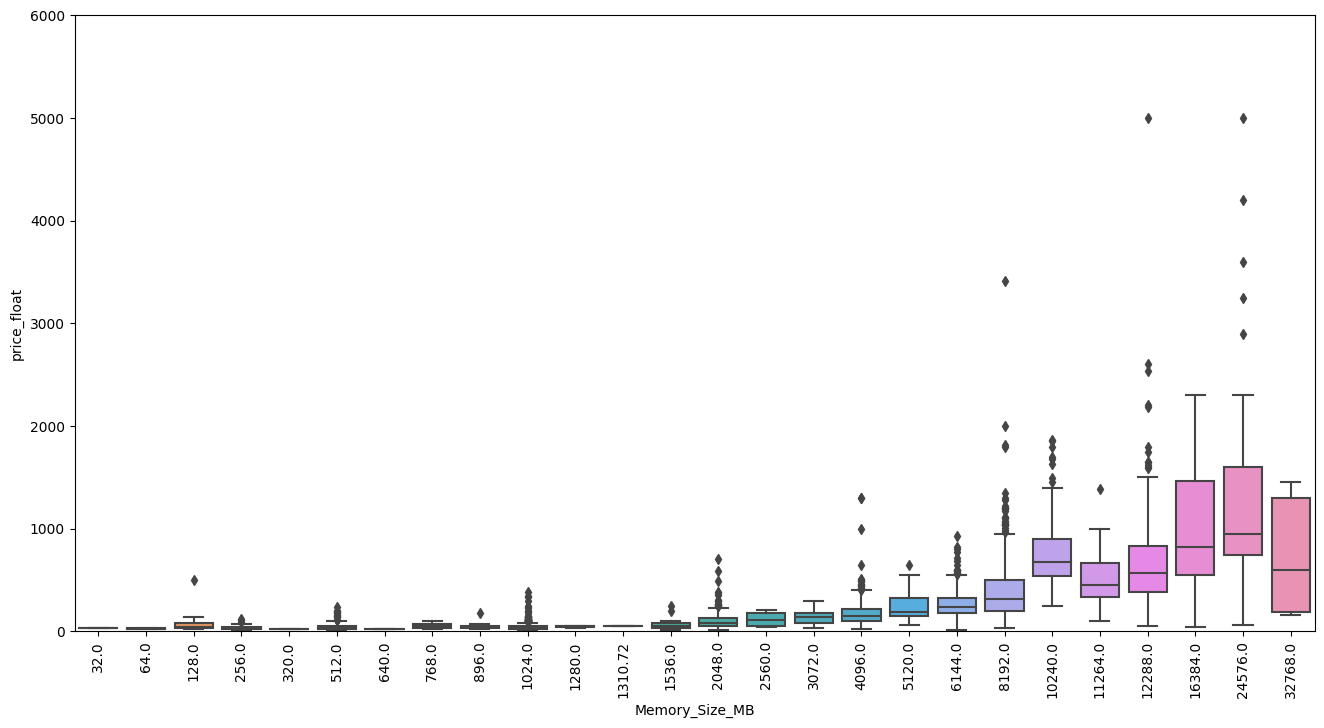

In [184]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="Memory_Size_MB", y="price_float", data=df)
fig.axis(ymin=0, ymax=6000);
plt.xticks(rotation=90);

<AxesSubplot: xlabel='Memory_Size_MB', ylabel='price_float'>

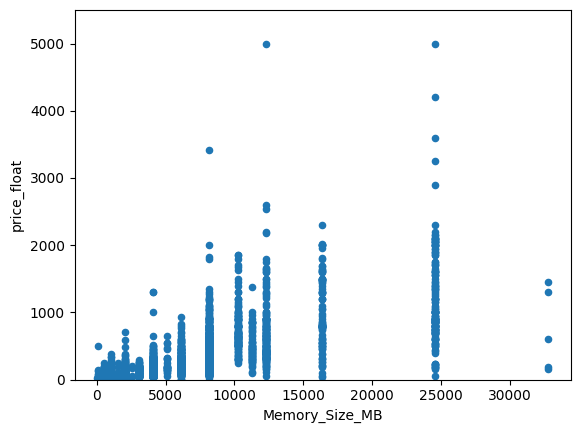

In [187]:
#scatter plot grlivarea/saleprice
var = "Memory_Size_MB"
df.plot.scatter(x=var, y='price_float', ylim=(0,5500))

In [161]:
sampled_categorical_data = df[["Brand", "Memory Type:", "condition"]]
sampled_categorical_data

,Brand,Memory Type:,condition
1,msi,GDDR6X,New
2,asus,DDR5,Used
4,msi,GDDR6,Used
6,nvidia,GDDR6,Used
7,gigabyte,GDDR6X,Used
...,...,...,...
5254,evga,GDDR6,Used
5256,gigabyte,GDDR6X,New
5257,evga,GDDR5,Used
5258,dell,GDDR5,Used


In [36]:
df["Memory Type:"].unique()

array(['GDDR6X', 'DDR5', 'GDDR6', 'GDDR5X', 'GDDR5', 'DDR3', 'HBM2',
       'GDDR3', '3D-RAM', 'DDR4', 'DDR6', 'GDDR3 SDRAM', 'VRAM', 'NA',
       'DDR1', 'GDDR5 SDRAM', 'GDDR2', 'DDR SGRAM', 'DDR2', 'DDR3 SDRAM',
       'HBM2e', 'HBM', 'GDDR 5', 'GDDR4', 'N/A', 'DDR SDRAM', '512MB',
       'Unknown', 'SDDR3', 'SDRAM', 'SDR SDRAM', 'DDR 6', 'GDDR5 4GB',
       'GDDR3/GDDR5', 'DDR', 'GDDR', 'DDR2 SDRAM', '512mb', 'Various',
       'DDR5 SDRAM'], dtype=object)

In [37]:
df.drop(df.index[(df["Memory Type:"] == "N/A")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "512mb")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "512MB")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "Various")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "Unknown")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "NA")],axis=0,inplace=True)

In [41]:
df.drop(df.index[(df["Chipset/GPU Model:"] == "N/A")],axis=0,inplace=True)

In [65]:
df["Brand:"].unique()

array(['MSI', 'ASUS', 'NVIDIA', 'GIGABYTE', 'EVGA', 'AMD', 'Graphics',
       'Evga', 'Dell', 'NVIDIA GeForce Msi Ventus 3x OC', 'DELL',
       'Gigabyte', 'DELL NVIDIA', 'Nvidia', 'NVIDIA Dell', 'ZOTAC',
       'HP  Dell  Nvidia', 'Dell  NVIDIA', 'AMD FirePro', 'XFX',
       'Graphics  MSI', 'Graphics  Dell', 'GIGABYTE (23)',
       'Japan GIGABYTE', 'Asus', 'NVIDIA GeForce GTX 1060', 'HP Nvidia',
       'GIGABYTE  MSI', 'Nvidia Evga', 'Nvidia Pny', 'Nvdia',
       'HP   Nvidia', 'Nvidia PALIT', 'HP   NVIDIA', 'AMD RADEON',
       'GALAKURO GAMING by KUROUTOSHIKOU', 'Nvidia Dell',
       'ZOTAC NVIDIA ZOTAC', 'nVidia', 'Msi Nvidia', 'Nvidia OEM',
       'RADEON', 'HP Asus', 'MSI  PNY  XFX  nVidia  Zotac', 'Inno3D',
       'HP NVIDIA', 'NVIDIA  HP  PNY', 'Lenovo  Nvidia', 'Dell Nvidia',
       'MSI   HP   Compaq', 'NVIDIA Quadro', 'AMD ATI', 'PNY NVIDIA',
       'Dell   Nvidia'], dtype=object)

In [64]:
df['Brand:'] = df['Brand:'].str.replace('|',' ').str.replace('/',' ').str.replace(',',' ')

C:\Users\empar\AppData\Local\Temp\ipykernel_1348\3822224967.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Brand:'] = df['Brand:'].str.replace('|',' ').str.replace('/',' ').str.replace(',',' ')


In [68]:
df["Brand"] = df["Brand:"].apply(lambda x: x.lower().split()[0])

In [151]:
df.drop(df.index[(df["Brand"] == "xfx")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "inno3d")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "japan")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "pny")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "galakuro")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "zotac")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "graphics")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "nvdia")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "radeon")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "lenovo")],axis=0,inplace=True)
df.drop(df.index[(df["Brand"] == "hp")],axis=0,inplace=True)

In [150]:
df.groupby("Brand").count()

,title,price,link,condition,item_specs,price_float,is_new,Chipset Manufacturer:,Brand:,Memory Size:,Chipset/GPU Model:,Memory Type:,Memory_Size_MB
Brand,,,,,,,,,,,,,
amd,243,243,243,243,243,243,243,243,243,243,243,243,243
asus,670,670,670,670,670,670,670,670,670,670,670,670,670
dell,289,289,289,289,289,289,289,289,289,289,289,289,289
evga,450,450,450,450,450,450,450,450,450,450,450,450,450
gigabyte,484,484,484,484,484,484,484,484,484,484,484,484,484
hp,9,9,9,9,9,9,9,9,9,9,9,9,9
lenovo,1,1,1,1,1,1,1,1,1,1,1,1,1
msi,652,652,652,652,652,652,652,652,652,652,652,652,652
nvidia,764,764,764,764,764,764,764,764,764,764,764,764,764


<AxesSubplot: xlabel='Brand', ylabel='count'>

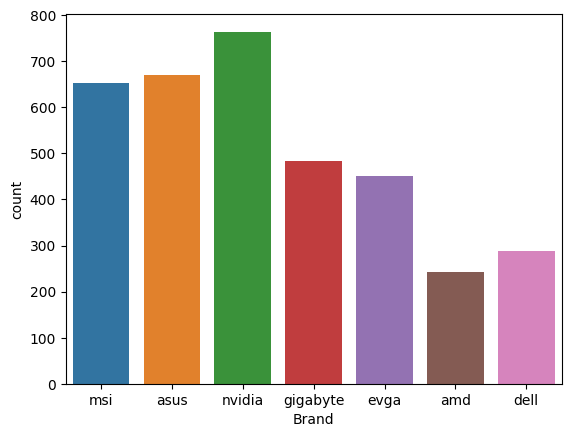

In [188]:
sns.countplot(data=sampled_categorical_data, x="Brand")

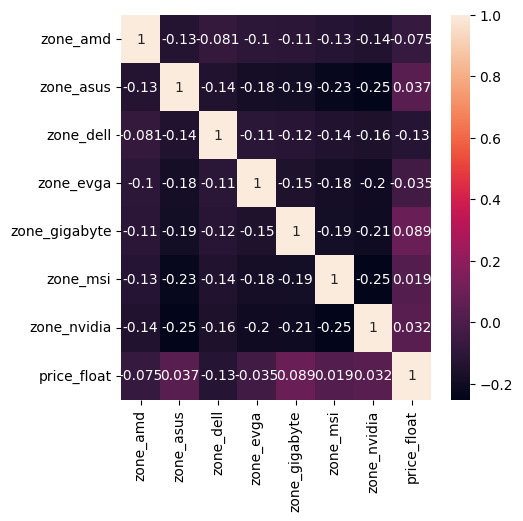

In [189]:
plt.figure(figsize=(5, 5))
corr = pd.concat([pd.get_dummies(sampled_categorical_data["Brand"], prefix="zone"), df[["price_float"]]], axis=1).corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# Look at cat data "Memory Type:"

In [96]:
df["Memory Type:"].unique()

array(['GDDR6X', 'DDR5', 'GDDR6', 'GDDR5X', 'GDDR5', 'DDR3', 'HBM2',
       'GDDR3', '3D-RAM', 'DDR4', 'DDR6', 'GDDR3 SDRAM', 'VRAM', 'DDR1',
       'GDDR5 SDRAM', 'GDDR2', 'DDR SGRAM', 'DDR2', 'DDR3 SDRAM', 'HBM2e',
       'HBM', 'GDDR 5', 'GDDR4', 'DDR SDRAM', 'SDDR3', 'SDRAM',
       'SDR SDRAM', 'DDR 6', 'GDDR5 4GB', 'GDDR3/GDDR5', 'DDR', 'GDDR',
       'DDR2 SDRAM', 'DDR5 SDRAM'], dtype=object)

In [135]:
df.drop(df.index[(df["Memory Type:"] == "SDR SDRAM")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "3D-RAM")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "HBM2e")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "HBM")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "GDDR4")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "SDDR3")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "SDRAM")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "SDR SDRAM")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "DDR")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "DDR SGRAM")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "DDR SDRAM")],axis=0,inplace=True)
df.drop(df.index[(df["Memory Type:"] == "GDDR")],axis=0,inplace=True)


In [136]:
df['Memory Type:'] = df['Memory Type:'].str.replace('GDDR3 SDRAM','GDDR3').str.replace('GDDR 5','GDDR5').str.replace('GDDR5 SDRAM','GDDR5').str.replace('DDR3 SDRAM','DDR3').str.replace('DDR 6','DDR6').str.replace('GDDR5 4GB','GDDR5').str.replace('GDDR3/GDDR5','GDDR5').str.replace('DDR2 SDRAM','DDR2').str.replace('DDR5 SDRAM','DDR5')

In [138]:

df.groupby("Memory Type:").count()

,title,price,link,condition,item_specs,price_float,is_new,Chipset Manufacturer:,Brand:,Memory Size:,Chipset/GPU Model:,Memory_Size_MB,Brand
Memory Type:,,,,,,,,,,,,,
DDR1,8,8,8,8,8,8,8,8,8,8,8,8,8
DDR2,51,51,51,51,51,51,51,51,51,51,51,51,51
DDR3,267,267,267,267,267,267,267,267,267,267,267,267,267
DDR4,20,20,20,20,20,20,20,20,20,20,20,20,20
DDR5,126,126,126,126,126,126,126,126,126,126,126,126,126
DDR6,14,14,14,14,14,14,14,14,14,14,14,14,14
GDDR2,11,11,11,11,11,11,11,11,11,11,11,11,11
GDDR3,224,224,224,224,224,224,224,224,224,224,224,224,224
GDDR5,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511


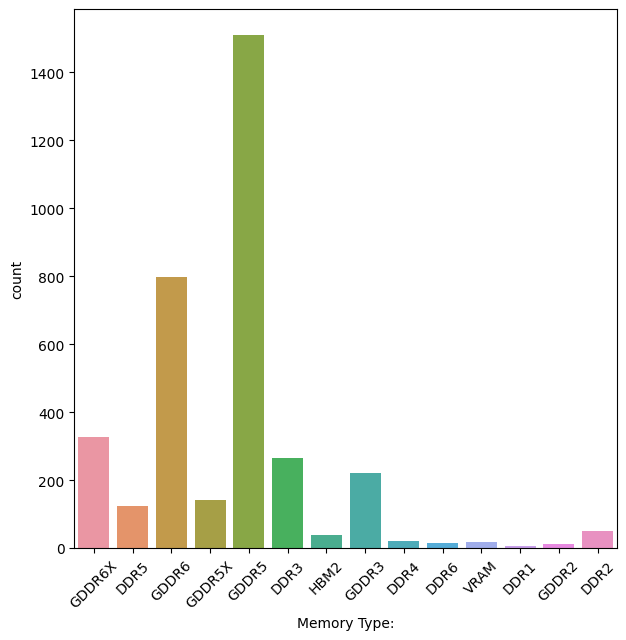

In [190]:
plt.figure(figsize=(7, 7))
sns.countplot(data=sampled_categorical_data, x="Memory Type:")
plt.xticks(rotation=45)
plt.show()

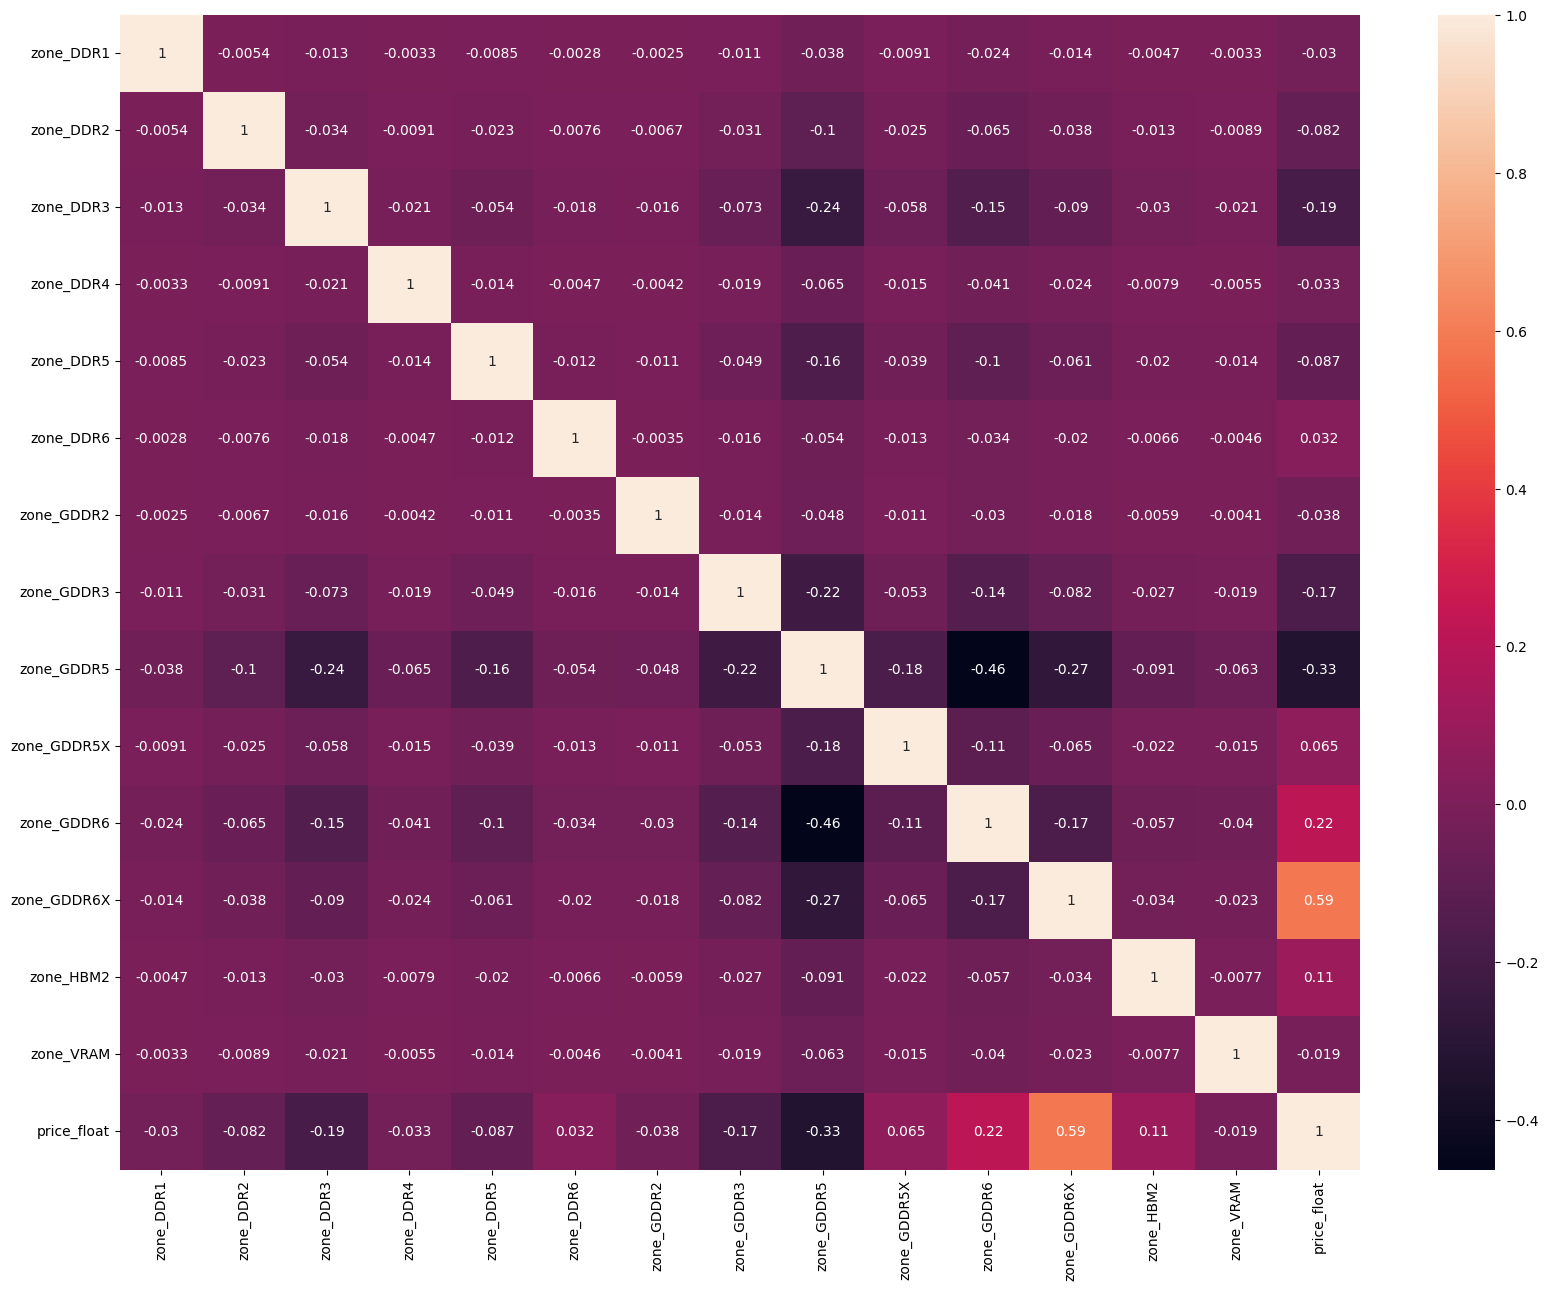

In [191]:
plt.figure(figsize=(20, 15))
corr = pd.concat([pd.get_dummies(sampled_categorical_data["Memory Type:"], prefix="zone"), df[["price_float"]]], axis=1).corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# Pipeline definition

In [192]:
train_data, test_data = train_test_split(df)

In [193]:
cont_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encode", OneHotEncoder())
])

In [194]:
cat_features = ["condition", "Brand", "Memory Type:"]
cont_features = ["Memory_Size_MB", ]

label = "price_float"

In [195]:
pipeline = Pipeline([
    
    ("ColumnTransformer", ColumnTransformer([
        ("cont_transformer", cont_pipeline, cont_features),
        ("cat_transformer", cat_pipeline, cat_features)
    ])),
    ("model", LinearRegression())
])

In [196]:
pipeline.fit(train_data, train_data[label].values)

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('cont_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Memory_Size_MB']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder())]),
                                                  ['condition', 'Brand',
                                                   'Memory Type:'])])),
                ('model', LinearRegression())])

In [197]:
predictions = pipeline.predict(test_data)
print("MAE", mean_absolute_error(test_data[label].values, predictions))
print("MSE", mean_squared_error(test_data[label].values, predictions))

MAE 142.73201897128592
MSE 67175.85517435329


In [158]:
cloudpickle.dump(pipeline, open("ebay_model.pkl", "wb"))

In [160]:
cloudpickle.load(open("./ebay_model.pkl", "rb"))

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('cont_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Memory_Size_MB']),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder())]),
                                                  ['condition', 'Brand',
                                                   'Memory Type:'])])),
                ('model', LinearRegression())])